In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from get_inceptionv3_embedding import get_inceptionv3_embedding

Using TensorFlow backend.


In [2]:
cwd = os.getcwd()
os.chdir('..')
from functions import diversity_experiment_edited
os.chdir(cwd)

In [3]:
# --- constants/globals --- #

# parameter for gist features
NBLOCKS = 4

# training hyperparameters
LR = .001
MOMENTUM = .9
BATCH_SIZE = 32
RUNS = 10
PATIENCE = 2

# dataset parameters
TRAIN_SIZES = [10, 20, 40, 60, 80, 100, 150, 200, 250, 500]
TRAIN_SIZES.reverse()
VAL_PROP = .5

embed_path = 'inceptionv3-embedding-train.npy'
edit_path = 'inceptionv3-5nn-cv-removal-indices.npy'

In [4]:
# load the cifar-10 data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
if embed_path in os.listdir():
    train_features = np.load(embed_path)
else:
    train_features = get_inceptionv3_embedding(x_train)

In [6]:
remove_ind = np.load(edit_path)

In [7]:
results_df = diversity_experiment_edited(x_train, y_train,
                                         train_features, 
                                         x_test, y_test,
                                         remove_ind,
                                         TRAIN_SIZES, VAL_PROP,
                                         RUNS,
                                         LR, MOMENTUM,
                                         BATCH_SIZE, PATIENCE, 
                                         verbose=0)

performing experiment for train size = 500
performing experiment for train size = 250
performing experiment for train size = 200
performing experiment for train size = 150
performing experiment for train size = 100
performing experiment for train size = 80
performing experiment for train size = 60
performing experiment for train size = 40
performing experiment for train size = 20
performing experiment for train size = 10


In [8]:
results_df.to_csv('cifar10-transfer-learning-edited-results.csv')

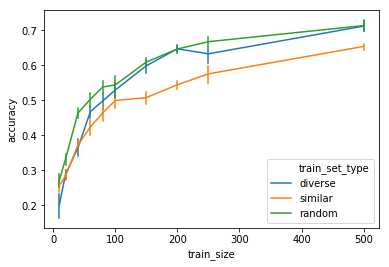

In [9]:
sns.lineplot(data=results_df, 
             x='train_size', y='accuracy', hue='train_set_type',
             err_style='bars')

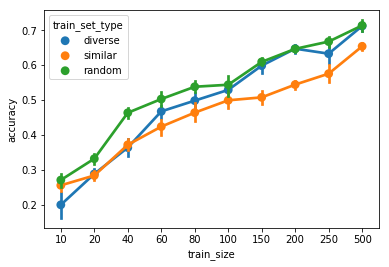

In [10]:
sns.pointplot(x='train_size', y='accuracy', hue='train_set_type', 
              data=results_df)